In [1]:
!pip install dataframe-image

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import dataframe_image as dfi

def format_and_save_table(df, title, output_filename):
    """
    Formats a DataFrame, prints it to the console, and saves it as a PNG image.
    """
    # --- Data Cleaning and Preparation ---

    # 1. Rename columns for better readability
    df_formatted = df.rename(columns={
        'model_type': 'Model Provider',
        'model_name': 'Model Name',
        'dataset': 'Dataset',
        'avg_latency_sec': 'Avg. Latency (sec)',
        'average_string_match_percentage': 'Exact Match (%)'
    })

    # 2. Capitalize the Model Provider names and replace 'Hf'
    df_formatted['Model Provider'] = df_formatted['Model Provider'].str.title()
    df_formatted['Model Provider'] = df_formatted['Model Provider'].str.replace('Hf', 'Hugging Face', regex=False)

    # 3. Clean up model names for clarity
    # (Using a copy to avoid SettingWithCopyWarning)
    df_formatted = df_formatted.copy()
    df_formatted['Model Name'] = df_formatted['Model Name'].str.replace('defog/llama-3-sqlcoder-8b', 'Llama 3 SQLCoder 8B', regex=False)
    df_formatted['Model Name'] = df_formatted['Model Name'].str.replace('defog/sqlcoder-7b-2', 'SQLCoder 7B-2', regex=False)
    df_formatted['Model Name'] = df_formatted['Model Name'].str.replace('llama-3.1-8b-instant', 'Llama 3.1 8B Instant', regex=False)
    df_formatted['Model Name'] = df_formatted['Model Name'].str.replace('llama-3.3-7b-versatile', 'Llama 3.3 70B Versatile', regex=False)
    df_formatted['Model Name'] = df_formatted['Model Name'].str.replace('llama-3.3-70b-versatile', 'Llama 3.3 70B Versatile', regex=False)
    df_formatted['Model Name'] = df_formatted['Model Name'].str.replace('openai/gpt-oss-120b', 'OpenAI GPT-OSS 120B', regex=False)
    df_formatted['Model Name'] = df_formatted['Model Name'].str.replace('openai/gpt-oss-20b', 'OpenAI GPT-OSS 20B', regex=False)

    # 4. Sort by 'Exact Match (%)' in descending order to show best models first
    df_formatted = df_formatted.sort_values(by='Exact Match (%)', ascending=False)

    # --- Save as Image ---
    print(f"Attempting to save table '{title}' to {output_filename}...")
    try:
        # Style the dataframe for a better visual output in the image
        styled_df = df_formatted.style.format({
            'Avg. Latency (sec)': '{:.2f}',
            'Exact Match (%)': '{:.2f}'
        }).set_table_styles(
            [{'selector': 'th', 'props': [('text-align', 'center')]},
             {'selector': 'td', 'props': [('text-align', 'center')]}]
        ).hide() # Use hide() instead of hide_index() for newer versions

        dfi.export(styled_df, output_filename, table_conversion='matplotlib')
        print(f"✅ Successfully saved table to {output_filename}")
    except Exception as e:
        print(f"❌ Error saving image: {e}")
        print("Please ensure you have installed the necessary libraries:")
        print("pip install dataframe-image")
        print("If you are in a headless environment, you might also need other dependencies.")

    # --- Printing the Table to Console ---
    # We format the numbers for printing after saving the styled version
    df_printable = df_formatted.copy()
    df_printable['Avg. Latency (sec)'] = df_printable['Avg. Latency (sec)'].map('{:.2f}'.format)
    df_printable['Exact Match (%)'] = df_printable['Exact Match (%)'].map('{:.2f}'.format)

    print(f"\n--- Results for {title} (Console Output) ---")
    header_str = f"{'Model Provider':<15} {'Model Name':<25} {'Dataset':<10} {'Avg. Latency (sec)':<20} {'Exact Match (%)':<15}"
    print(header_str)
    print("-" * len(header_str))

    for _, row in df_printable.iterrows():
        print(f"{row['Model Provider']:<15} {row['Model Name']:<25} {row['Dataset']:<10} {row['Avg. Latency (sec)']:<20} {row['Exact Match (%)']:<15}")


def main():
    """
    Main function to load data and generate the formatted tables as images.
    """
    # Note: You may need to install this library first!
    # pip install dataframe-image
    try:
        df = pd.read_csv('summary_metrics.csv')
    except FileNotFoundError:
        print("Error: 'summary_metrics.csv' not found. Please ensure the file is in the same directory as the script.")
        return

    spider_df = df[df['dataset'] == 'spider'].copy()
    wikisql_df = df[df['dataset'] == 'wikisql'].copy()

    if not spider_df.empty:
        format_and_save_table(spider_df, "Spider Dataset", "spider_results.png")

    print("\n" + "="*80 + "\n")

    if not wikisql_df.empty:
        format_and_save_table(wikisql_df, "WikiSQL Dataset", "wikisql_results.png")


if __name__ == '__main__':
    main()



Attempting to save table 'Spider Dataset' to spider_results.png...
✅ Successfully saved table to spider_results.png

--- Results for Spider Dataset (Console Output) ---
Model Provider  Model Name                Dataset    Avg. Latency (sec)   Exact Match (%)
-----------------------------------------------------------------------------------------
Groq            Llama 3.3 70B Versatile   spider     1.00                 69.91          
Groq            Llama 3.1 8B Instant      spider     1.07                 69.03          
Groq            OpenAI GPT-OSS 120B       spider     2.01                 60.09          
Groq            OpenAI GPT-OSS 20B        spider     1.44                 57.49          
Hugging Face    Llama 3 SQLCoder 8B       spider     2.81                 52.28          
Hugging Face    SQLCoder 7B-2             spider     3.26                 49.51          


Attempting to save table 'WikiSQL Dataset' to wikisql_results.png...
✅ Successfully saved table to wikisql_re

Loading existing table images...
Combining images into a single file...
✅ Successfully saved combined results to combined_results.png


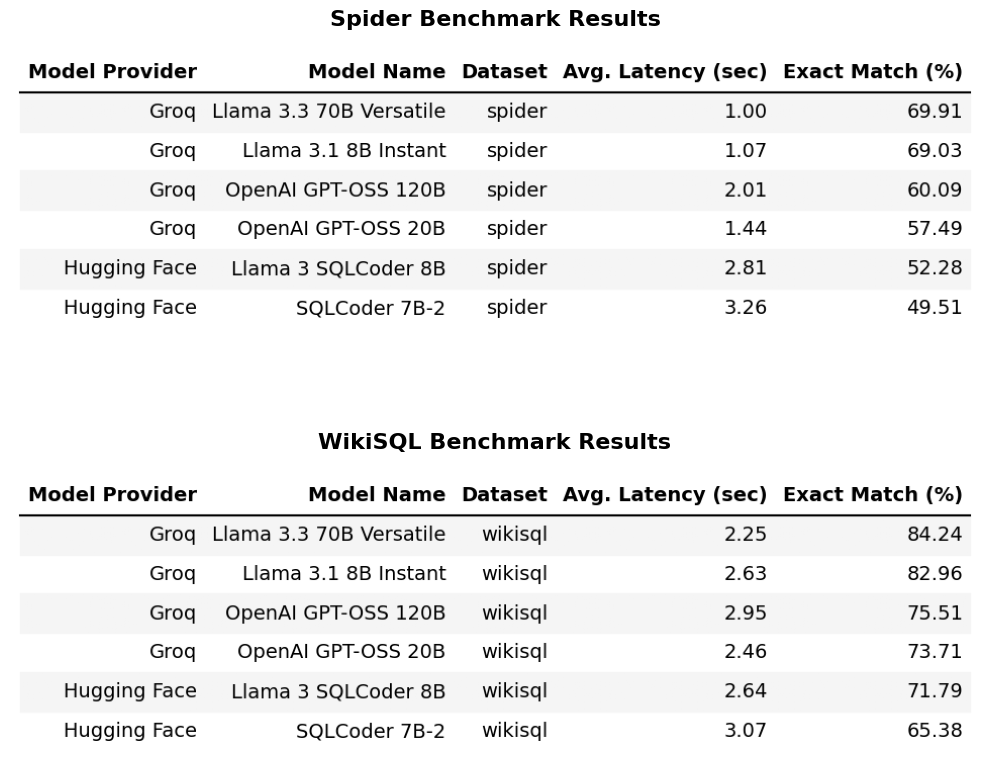

In [6]:
import matplotlib.pyplot as plt
import os

def combine_images(spider_image_path, wikisql_image_path, output_filename):
    """
    Loads two image files and combines them vertically into a single image.
    """
    # --- Check if input files exist ---
    if not os.path.exists(spider_image_path):
        print(f"❌ Error: Input file not found at '{spider_image_path}'")
        return
    if not os.path.exists(wikisql_image_path):
        print(f"❌ Error: Input file not found at '{wikisql_image_path}'")
        return

    print("Loading existing table images...")
    # Read the two images into memory
    img_spider = plt.imread(spider_image_path)
    img_wikisql = plt.imread(wikisql_image_path)

    print("Combining images into a single file...")
    # Create a matplotlib figure with 2 subplots (arranged vertically)
    # Reduced the figure height from 10 to 9 to decrease overall whitespace
    fig, axes = plt.subplots(2, 1, figsize=(10, 9))

    # --- Plot Spider Table Image ---
    axes[0].set_title("Spider Benchmark Results", fontsize=16, weight='bold', pad=20)
    axes[0].imshow(img_spider)
    axes[0].axis('off')  # Hide axis ticks, labels, and borders

    # --- Plot WikiSQL Table Image ---
    axes[1].set_title("WikiSQL Benchmark Results", fontsize=16, weight='bold', pad=20)
    axes[1].imshow(img_wikisql)
    axes[1].axis('off')  # Hide axis ticks, labels, and borders

    # Adjust layout to prevent titles and tables from overlapping
    # Reduced h_pad from 5.0 to 2.0 to bring the two plots closer together
    plt.tight_layout(h_pad=2.0)

    # Save the entire figure as a single PNG file
    try:
        plt.savefig(output_filename, dpi=300, bbox_inches='tight')
        print(f"✅ Successfully saved combined results to {output_filename}")
    except Exception as e:
        print(f"❌ Error saving combined image: {e}")

def main():
    """
    Main function to define file paths and call the combiner.
    """
    spider_file = 'spider_results.png'
    wikisql_file = 'wikisql_results.png'
    final_output_file = 'combined_results.png'

    combine_images(spider_file, wikisql_file, final_output_file)

if __name__ == '__main__':
    main()

